The main goal of natural language processing (NLP) is to derive information from natural language.


* Text (such as that contained in an email, blog post, book, Tweet)
* Speech (a conversation you have with a doctor, voice commands you give to a smart speaker)

🔑 Note: Both of these types of data are often referred to as sequences (a sentence is a sequence of words). So a common term we'll come across in NLP problems is called seq2seq, in other words, finding information in one sequence to produce another sequence (e.g. converting a speech command to a sequence of text-based steps).


Steps in NLP:

`Text -> turn into numbers -> build a model -> train the model to find patterns -> use patterns (make predictions)`

RECAP!!

What is RCNN:

A class of AI neural network where connections between nodes form a directed graph along a temporal sequence (data that have starting point and ending point).



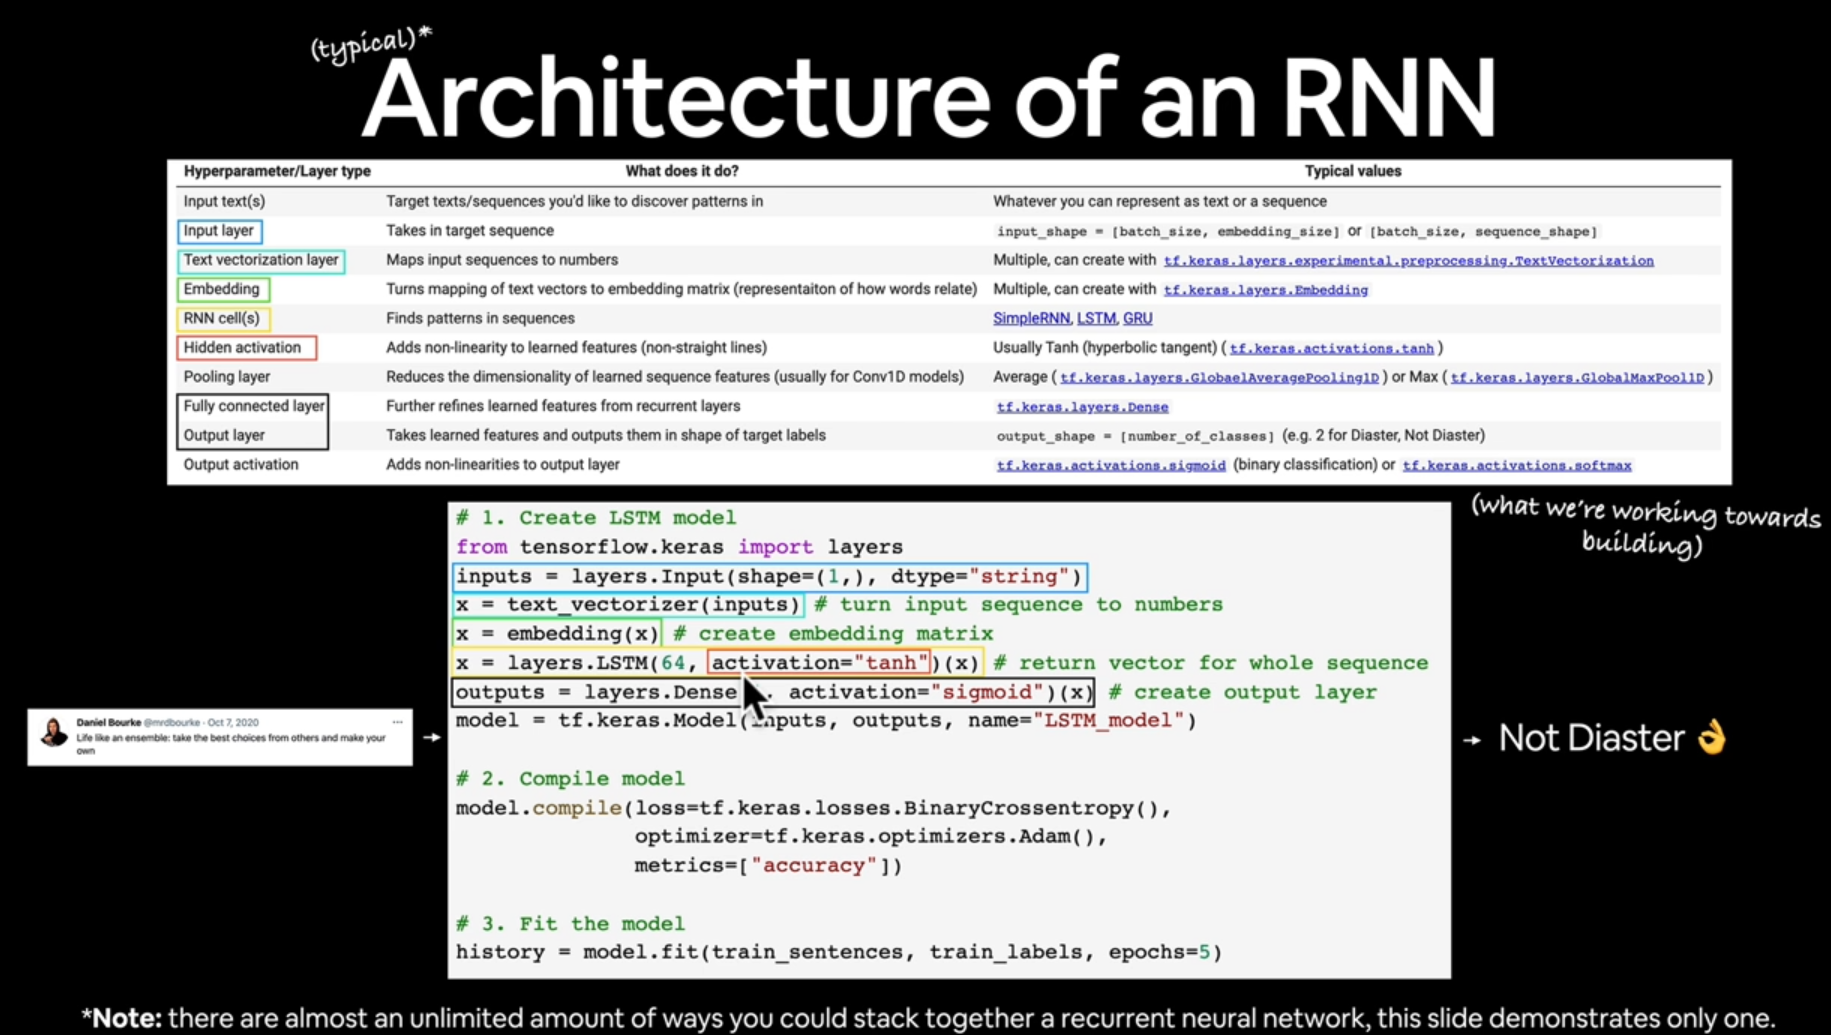

## Check for GPU

In [3]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-d80b9a57-bf9a-c1c8-09af-a620397a888c)


## Get helper function

In [4]:
# Download helper function
!wget https://raw.githubusercontent.com/SNNJM/Tensorflow_Deep_Learning/main/extras/helper_function.py
    

--2023-03-20 14:33:50--  https://raw.githubusercontent.com/SNNJM/Tensorflow_Deep_Learning/main/extras/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10308 (10K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]  10.07K  --.-KB/s    in 0s      

2023-03-20 14:33:50 (91.5 MB/s) - ‘helper_function.py’ saved [10308/10308]



In [5]:
# Import series of helper functions for the notebook
from helper_function import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys
     

## Get a text dataset

Kaggle's intro to NLP datasets (test samples of Teets labelled as disaster or not disaster)

Ori source: https://www.kaggle.com/competitions/nlp-getting-started



In [6]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-03-20 14:33:54--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2023-03-20 14:33:54 (111 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [7]:
#Unzip data
unzip_data("nlp_getting_started.zip")

## Visualizing a text dataset

Explore it Inspect it Verify it Become one with it

Right now, our text data samples are in the form of .csv files. For an easy way to make them visual, let's turn them into pandas DataFrame's.


* [How to Read and Write Files in Python](https://realpython.com/read-write-files-python/)
* [Working with JSON Data in Python](https://realpython.com/python-json/)


### Check train data

In [8]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
train_df["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [10]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

Target = 1 == disaster

In [11]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


### Check test data

In [12]:
# check test dataframe
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


with test data, we are tryig to predict the target column (0 or 1)

### Check for imbalance data

In [13]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

Total is quite balanced

In [14]:
# How many total samples
len(train_df), len(test_df)

(7613, 3263)

### Visualize random training samples

In [15]:
import random
random_index = random.randint(0, len(train_df)-5) # create rand indexes != higher than total num of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(disaster)" if target > 0 else "(NOT disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")


# _ is to get rid of index


Target: 1 (disaster)
Text:
Today Japan marks 70 yrs since the U.S (A) bombed 2 cities killing over 120000 people But we have to worry about Iran http://t.co/FcIXk23XQH

---

Target: 0 (NOT disaster)
Text:
@iamHorsefly hide your kids hide your wife. He's on the loose. I thought I flattened you with a ball ????

---

Target: 0 (NOT disaster)
Text:
The Next Financial Crash. ÛÏThe Writing is on the WallÛ. DonÛªt Say ÛÏYou WerenÛªt WarnedÛ https://t.co/4PQCMQchnG via @grtvnews

---

Target: 0 (NOT disaster)
Text:
Hollywood Movie About Trapped Miners Released in Chile: 'The 33' Hollywood movie about trapped miners starring... http://t.co/KK8cnppZMk

---

Target: 0 (NOT disaster)
Text:
Crackdown 3 Destruction Restricted to Multiplayer: Crackdown 3 impressed earlier this week with a demonstratio... http://t.co/N08qluornx

---



## Split data into training and validation sets

Since the test set has no labels and we need a way to evalaute our trained models, we'll split off some of the training data and create a validation set.

When our model trains (tries patterns in the Tweet samples), it'll only see data from the training set and we can see how it performs on unseen data using the validation set.

We'll convert our splits from pandas Series datatypes to lists of strings (for the text) and lists of ints (for the labels) for ease of use later.

To split our training dataset and create a validation dataset, we'll use Scikit-Learn's train_test_split() method and dedicate 10% of the training samples to the validation set.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility



In [18]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [19]:
# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

# Convert text into numbers

We've got a training set and a validation set containing Tweets and labels.

Our labels are in numerical form (0 and 1) but our Tweets are in string form.

A machine learning algorithm requires its inputs to be in numerical form.


In NLP, there are two main concepts for turning text into numbers:

**Tokenization** - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:

1. Using **word-level tokenization** with the sentence "I love TensorFlow" might result in "I" being 0, "love" being 1 and "TensorFlow" being 2. In this case, every word in a sequence considered a single token.
2. **Character-level tokenization**, such as converting the letters A-Z to values 1-26. In this case, every character in a sequence considered a single token.
3. **Sub-word tokenization** is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every word could be considered multiple tokens.

**Embeddings**- An embedding is a representation of natural language which can be learned. Representation comes in the form of a **feature vector**. For example, the word "dance" could be represented by the 5-dimensional vector [-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]. It's important to note here, the size of the feature vector is tuneable. There are two ways to use embeddings:
1. **Create your own embedding** - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as tf.keras.layers.Embedding) and an embedding representation will be learned during model training.
2. **Reuse a pre-learned embedding** - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.



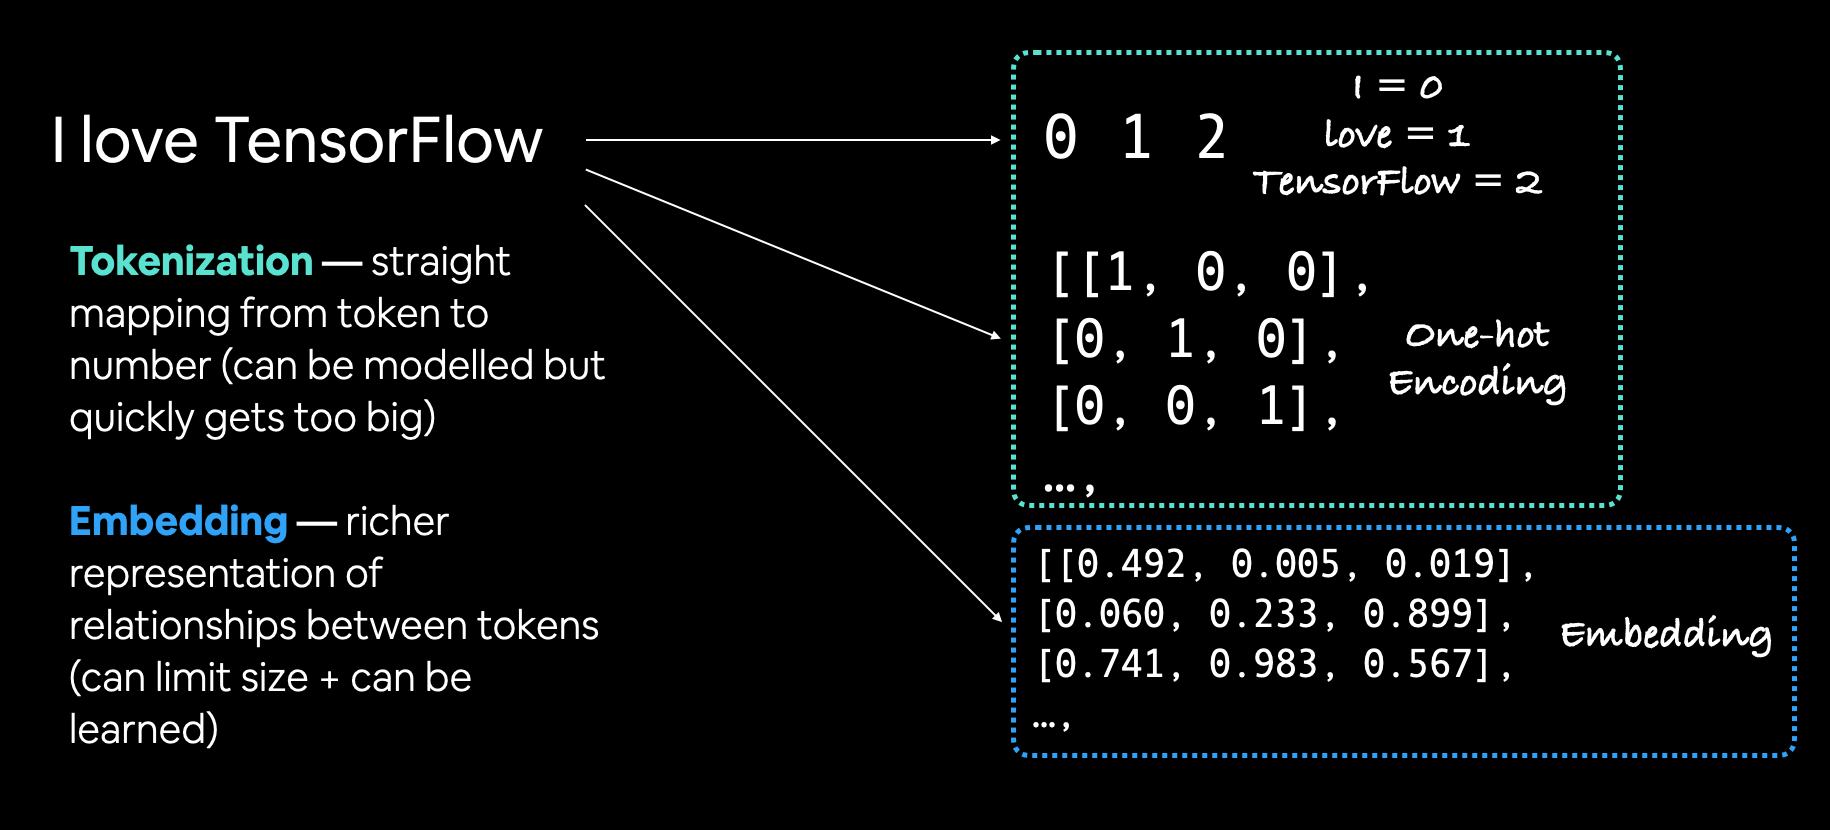

Example of tokenization* (straight mapping from word to number) and embedding (richer representation of relationships between tokens).*

We could try character-level tokenization/embeddings and word-level tokenization/embeddings and see which perform best. We might even want to try stacking them (e.g. combining the outputs of your embedding layers using tf.keras.layers.concatenate).


If we're looking for pre-trained word embeddings, [Word2vec embeddings](http://jalammar.github.io/illustrated-word2vec/), [GloVe embeddings](https://nlp.stanford.edu/projects/glove/) and many of the options available on[ TensorFlow Hub](https://tfhub.dev/s?module-type=text-embedding) are great places to start.

##Text vectorization (tokenization)


We'll practice tokenzation (mapping our words to numbers) first.

To tokenize our words, we'll use the helpful preprocessing layer 
`tf.keras.layers.experimental.preprocessing.TextVectorization`.

The `TextVectorization` layer takes the following parameters:

* `max_tokens` * - The maximum number of words in your vocabulary (e.g. 20000 or the number of unique words in your text), includes a value for OOV (out of vocabulary) tokens.
* `standardize` - Method for standardizing text. Default is "lower_and_strip_punctuation" which lowers text and removes all punctuation marks.
* `split` * - How to split text, default is "whitespace" which splits on spaces.
* `ngrams` * - How many words to contain per token split, for example, ngrams=2 splits tokens into continuous sequences of 2.
* `output_mode` * - How to output tokens, can be "int" (integer mapping), "binary" (one-hot encoding), "count" or "tf-idf". See documentation for more.
* `output_sequence_length` * - Length of tokenized sequence to output. For example, if output_sequence_length=150, all tokenized sequences will be 150 tokens long.
* `pad_to_max_tokens` * - Defaults to False, if True, the output feature axis will be padded to max_tokens even if the number of unique tokens in the vocabulary is less than max_tokens. Only valid in certain modes, see docs for more.


In [20]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None



We've initialized a TextVectorization object with the default settings but let's customize it a little bit for our own use case.

In particular, let's set values for max_tokens and output_sequence_length.

For max_tokens (the number of words in the vocabulary), multiples of 10,000 (10,000, 20,000, 30,000) or the exact number of unique words in your text (e.g. 32,179) are common values.

For our use case, we'll use 10,000.

And for the output_sequence_length we'll use the average number of tokens per Tweet in the training set. But first, we'll need to find it.


In [21]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))



15



Now let's create another TextVectorization object using our custom parameters.


In [22]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

To map our TextVectorization instance text_vectorizer to our data, we can call the adapt() method on it whilst passing it our training text.

In [23]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

Training data mapped! Let's try our text_vectorizer on a custom sentence (one similar to what you might see in the training data).

In [24]:
# Create sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>



Wonderful, it seems we've got a way to turn our text into numbers (in this case, word-level tokenization). Notice the 0's at the end of the returned tensor, this is because we set output_sequence_length=15, meaning no matter the size of the sequence we pass to text_vectorizer, it always returns a sequence with a length of 15.

How about we try our text_vectorizer on a few random sentences?


In [25]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Photo: blue by @forest.fires source: http://t.co/awXR24zsqh http://t.co/o9A26Fn27y      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 343,  824,   18,    1, 2694,    1,    1,    0,    0,    0,    0,
           0,    0,    0,    0]])>

Finally, we can check the unique tokens in our vocabulary using the get_vocabulary() method.

In [26]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


## Creating an Embedding using an Embedding Layer

We've got a way to map our text to numbers. How about we go a step further and turn those numbers into an embedding?

The powerful thing about an embedding is it can be learned during training. This means rather than just being static (e.g. 1 = I, 2 = love, 3 = TensorFlow), a word's numeric representation can be improved as a model goes through data samples.

We can see what an embedding of a word looks like by using the tf.keras.layers.Embedding layer.

The main parameters we're concerned about here are:

* `input_dim` * - The size of the vocabulary (e.g. len(text_vectorizer.get_vocabulary()).
output_dim - The size of the output embedding vector, for example, a value of 100 outputs a feature vector of size 100 for each word.
* `embeddings_initializer` * - How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
* `input_length` * - Length of sequences being passed to embedding layer.

Knowing these, let's make an embedding layer.

In [27]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

notice how embedding is a TensoFlow layer? This is important because we can use it as part of a model, meaning its parameters (word representations) can be updated and improved as the model learns.

How about we try it out on a sample sentence?

In [28]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
How One Couple Is Using Drones to Save Refugees at the World's Deadliest Border http://t.co/9qpG0Z3Rh9      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00620236,  0.01724739,  0.00893668, ..., -0.04924543,
         -0.04917607, -0.04340873],
        [-0.03423747, -0.04256539,  0.02659218, ..., -0.00843044,
         -0.00660282,  0.00408242],
        [ 0.04671106,  0.00559766,  0.04151993, ...,  0.0439756 ,
          0.03084861, -0.0392396 ],
        ...,
        [ 0.03749332,  0.01464149, -0.04448531, ..., -0.01223596,
          0.00480889, -0.00189294],
        [-0.00029773, -0.04561678,  0.00039352, ..., -0.01559527,
          0.0031724 , -0.04964162],
        [ 0.0387507 ,  0.0075233 , -0.03690695, ..., -0.03613844,
         -0.04162752, -0.04987169]]], dtype=float32)>

Each token in the sentence gets turned into a length 128 feature vector.

These values might not mean much to us but they're what our computer sees each word as. When our model looks for patterns in different samples, these values will be updated as necessary.

In [29]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.00620236,  0.01724739,  0.00893668,  0.01657517,  0.03821012,
       -0.03367379,  0.01096606, -0.00642858,  0.03837389,  0.02887282,
       -0.03836058, -0.03359623, -0.03475494,  0.03141025,  0.01873725,
        0.03954962, -0.04056359, -0.03249298,  0.04575273,  0.03197492,
       -0.03849661,  0.038397  , -0.02904203,  0.00320653, -0.02937563,
       -0.03765942,  0.00074879, -0.03978898, -0.00088232, -0.02173991,
       -0.03079367, -0.04850196,  0.02826514, -0.04613903, -0.01978141,
        0.04689651, -0.03988739, -0.02257385,  0.0142065 ,  0.03326236,
       -0.04549316,  0.02920567, -0.04959767,  0.00916805,  0.02225334,
       -0.0058887 ,  0.0019173 , -0.03538722, -0.01550498, -0.00767286,
        0.03658119, -0.03325251, -0.01928074,  0.03144201, -0.01926591,
       -0.0271561 , -0.02141249, -0.03628038,  0.04621394, -0.02302922,
        0.04539105, -0.0051242 , -0.04663037,  0.01043459,  0.00900048,
        0.032447

# Modelling a text dataset

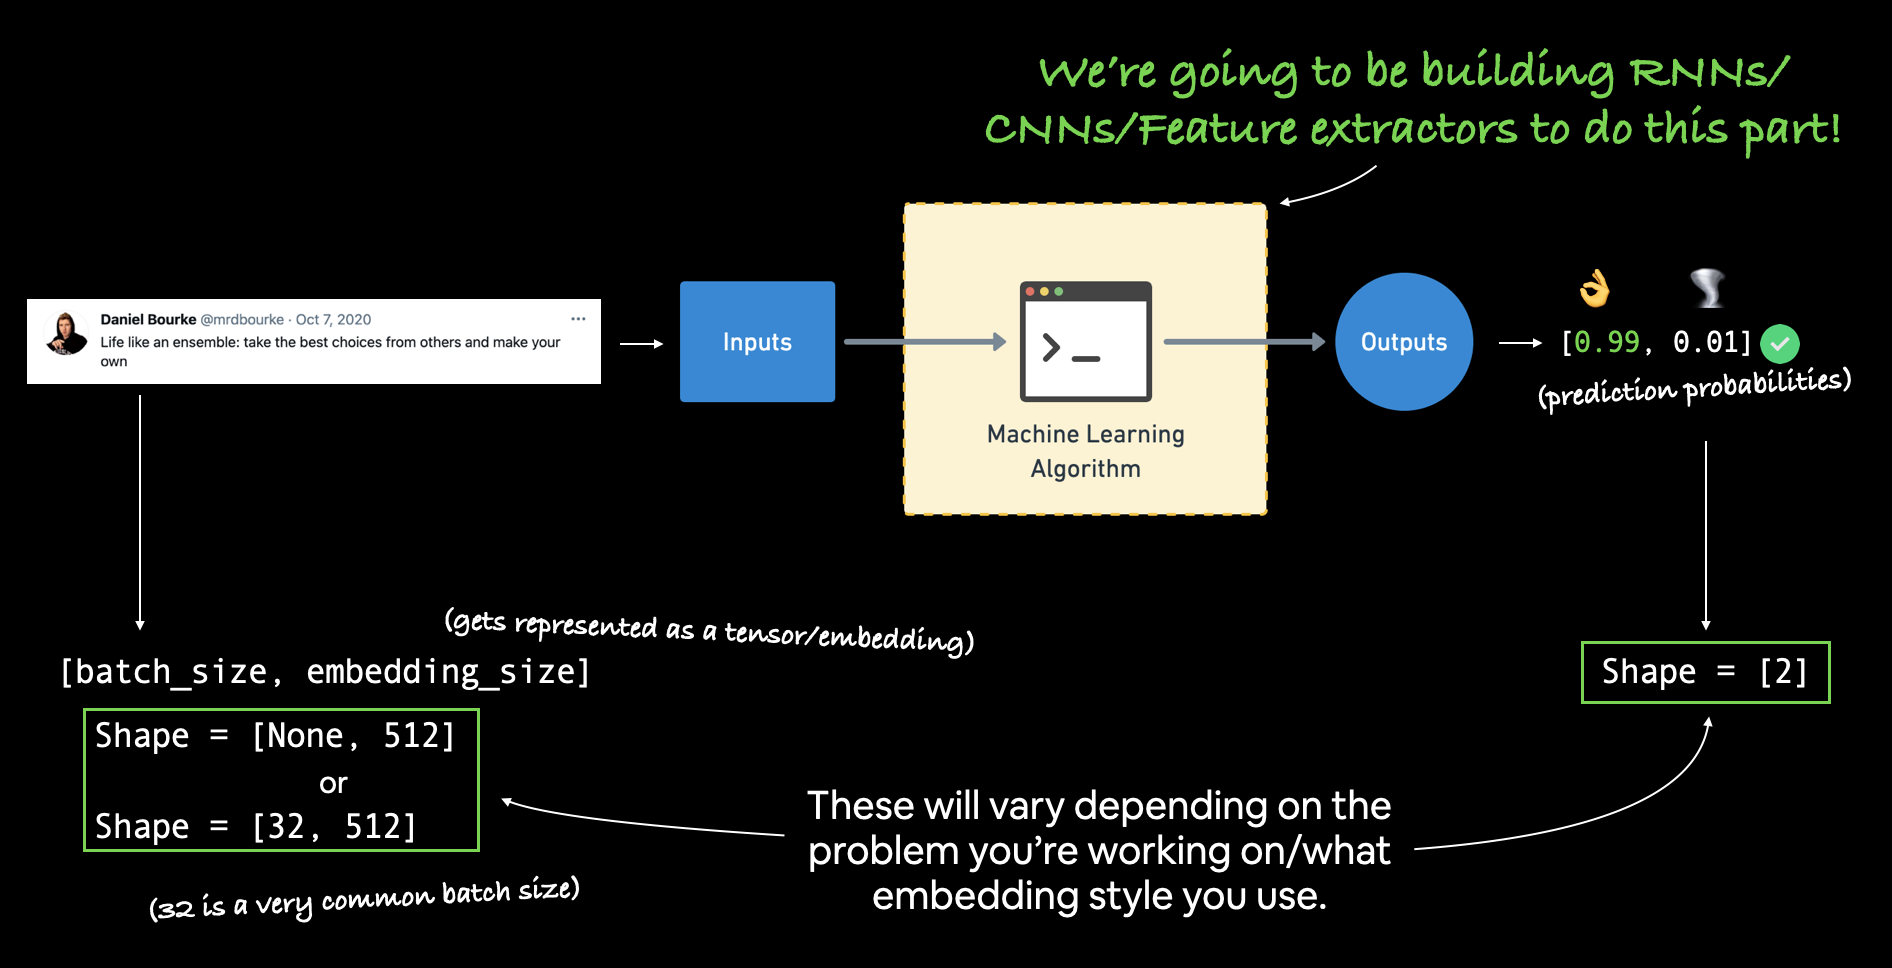


Once we've got our inputs and outputs prepared, it's a matter of figuring out which machine learning model to build in between them to bridge the gap.

Now that we've got a way to turn our text data into numbers, we can start to build machine learning models to model it.

To get plenty of practice, we're going to build a series of different models, each as its own experiment. We'll then compare the results of each model and see which one performed best.

More specifically, we'll be building the following:

* **Model 0** *: Naive Bayes (baseline) TF-IDF encoder
* **Model 1** *: Feed-forward neural network (dense model)
* **Model 2** *: LSTM model (RNN)
* **Model 3** *: GRU model (RNN)
* **Model 4** *: Bidirectional-LSTM model (RNN)
* **Model 5** *: 1D Convolutional Neural Network
* **Model 6** *: TensorFlow Hub Pretrained Feature Extractor
* **Model 7** *: Same as model 6 with 10% of training data

Model 0 is the simplest to acquire a baseline which we'll expect each other of the other deeper models to beat.

Use standard steps in modelling with tensorflow:

* Create a model
* Build a model
* Fit a model
* Evaluate model


##Model 0: Getting a baseline

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll create a Scikit-Learn Pipeline using the TF-IDF (term frequency-inverse document frequency) formula to convert our words to numbers and then model them with the Multinomial Naive Bayes algorithm. This was chosen via referring to the Scikit-Learn machine learning map.

It's common to use non DL algorithm because of their speed and then later using DL to see if we can improve them

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [31]:
# Evaluate our baseline model

baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [32]:
# Make predictions with the baseline model (model_0)
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

## Creating an evaluation function for our model experiments

We could evaluate these as they are but since we're going to be evaluating several models in the same way going forward, let's create a helper function which takes an array of predictions and ground truth labels and computes the following:

* Accuracy
* Precision
* Recall
* F1-score


In [33]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [34]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 1: A simple dense model

The first "deep" model we're going to build is a single layer dense model. In fact, it's barely going to have a single layer.

It'll take our text and labels as input, tokenize the text, create an embedding, find the average of the embedding (using Global Average Pooling) and then pass the average through a fully connected layer with one output unit and a sigmoid activation function.

If the previous sentence sounds like a mouthful, it'll make sense when we code it out (remember, if in doubt, code it out).

And since we're going to be building a number of TensorFlow deep learning models, we'll import our create_tensorboard_callback() function from helper_functions.py to keep track of the results of each.

In [36]:
# Create tensorboard callback (need to create a new one for each model)
from helper_function import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [37]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

Our model takes a 1-dimensional string as input (in our case, a Tweet), it then tokenizes the string using text_vectorizer and creates an embedding using embedding.

We then (optionally) pool the outputs of the embedding layer to reduce the dimensionality of the tensor we pass to the output layer.

Finally, we pass the output of the pooling layer to a dense layer with sigmoid activation (we use sigmoid since our problem is binary classification).

Before we can fit our model to the data, we've got to compile it. Since we're working with binary classification, we'll use "binary_crossentropy" as our loss function and the Adam optimizer.

In [38]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [39]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N



Most of the trainable parameters are contained within the embedding layer. Recall we created an embedding of size 128 (output_dim=128) for a vocabulary of size 10,000 (input_dim=10000), hence the 1,280,000 trainable parameters.

Alright, our model is compiled, let's fit it to our training data for 5 epochs. We'll also pass our TensorBoard callback function to make sure our model's training metrics are logged.


In [40]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230320-144207
Epoch 1/5
215/215 [==============================] - 16s 49ms/step - loss: 0.6107 - accuracy: 0.6904 - val_loss: 0.5373 - val_accuracy: 0.7520
Epoch 2/5
215/215 [==============================] - 2s 12ms/step - loss: 0.4425 - accuracy: 0.8174 - val_loss: 0.4697 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3476 - accuracy: 0.8597 - val_loss: 0.4592 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2861 - accuracy: 0.8915 - val_loss: 0.4639 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2391 - accuracy: 0.9124 - val_loss: 0.4760 - val_accuracy: 0.7861


In [41]:
# check our model's performance on the validation set.
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.4760 - accuracy: 0.7861


[0.4760417640209198, 0.7860892415046692]

In [42]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-0.04257791, -0.01488144, -0.05925549, ..., -0.03810578,
         -0.03596688, -0.03515648],
        [ 0.03906747,  0.00822348, -0.03738193, ..., -0.03641578,
         -0.04275454, -0.05197337],
        [ 0.02541683,  0.02344625, -0.01330188, ..., -0.00302318,
         -0.00686867,  0.02493722],
        ...,
        [-0.02406283, -0.01628746,  0.00107551, ...,  0.04520572,
          0.04996992,  0.00618358],
        [-0.06239663,  0.03544036, -0.06372854, ..., -0.05356828,
         -0.02613194,  0.08794846],
        [-0.01927597,  0.06773517, -0.03534526, ..., -0.0386589 ,
         -0.05653104,  0.05500438]], dtype=float32)>]

In [44]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)



(10000, 128)


In [46]:
# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./model_logs \
   --name "First deep model on text data" \
   --description "Trying a dense model with an embedding layer" \
   --one_shot # exits the uploader when upload has finished

2023-03-20 14:43:38.018245: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-20 14:43:38.018347: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-20 14:43:38.018366: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard wil

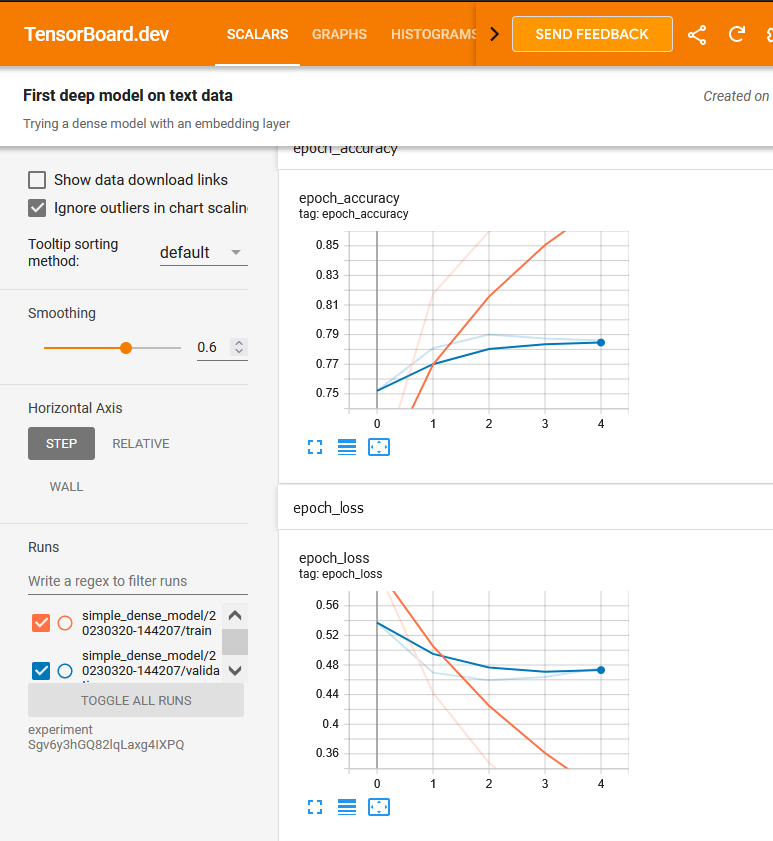

In [47]:
# If you need to remove previous experiments, you can do so using the following command
# !tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE

In [48]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # only print out the first 10 prediction probabilities

24/24 [==============================] - 0s 2ms/step


array([[0.42305794],
       [0.7455379 ],
       [0.99786466],
       [0.11287327],
       [0.11467534],
       [0.93432873],
       [0.9159956 ],
       [0.9928685 ],
       [0.9698864 ],
       [0.26971912]], dtype=float32)

Since our final layer uses a sigmoid activation function, we get our predictions back in the form of probabilities.

To convert them to prediction classes, we'll use tf.round(), meaning prediction probabilities below 0.5 will be rounded to 0 and those above 0.5 will be rounded to 1.

In [49]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [50]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.60892388451444,
 'precision': 0.7903277546022673,
 'recall': 0.7860892388451444,
 'f1': 0.7832971347503846}

In [51]:
# compare our first deep model to our baseline model
# Is our simple Keras model better than our baseline model?
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [52]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results, 
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 78.61, Difference: -0.66
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00
